# Growth Contributions using Solow Model

---

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


from matplotlib import ticker
from matplotlib.dates import DateFormatter


warnings.filterwarnings("ignore")

##  <a id='Out'> Outline </a>
- <a href='#1_moddata'> 1. Model and data  </a>
- <a href='#2_GDP'> 2. GDP growth </a>
- <a href='#3_capital'> 3. Capital growth </a>
- <a href='#4_labor'> 4. Labor growth </a>
- <a href='#5_product'>5. Productivity </a>
- <a href='#6_cont_graph'> 6. Growth Contributions - Graph </a>
- <a href='#7_cont_tab'> 7. Growth Contributions - Table </a>

## <a id='1_dmoddata'> Model and data </a>
The present document has the objective of decompose peruvian economic growth using the Solow model. In this model GDP is a function of productivity $(A_{t})$, capital $(K_{t})$ and labor $(L_{t})$

$$Y_{t} = A_{t} K_{t}^{\alpha} L_{t}^{1-\alpha}~~~~~ 0<\alpha<1$$

this last function can be expresend in growth rates

$$\Delta y_{t} = \Delta a_{t} + \alpha \Delta k_{t} + (1 - \alpha) \Delta l_{t}$$

With this equation we can calculate the contributions of capital, labor and productivity to economic growth. For this we need the followig data
- **GDP**: Extracted from BCRP Data (Item: PM05000AA)
- **Gross Fixed Investment**: Extracted from BCRP Data (Item: PM04929AA)
- **Economically Active Population**: Extracted from INEI Data (Series nacionales and various tables from INEI publications)

In [2]:
# Data
df = pd.read_csv(r".\data\solow_peru_data.csv")
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)
df

,I,Y,L
date,,,
1950-01-01,5111.49,40920,NaN
1951-01-01,6821.09,44711,NaN
1952-01-01,7987.16,47347,NaN
1953-01-01,8625.31,50085,NaN
1954-01-01,7244.26,52762,NaN
...,...,...,...
2016-01-01,116496.65,501581,16903.68
2017-01-01,116164.89,514215,17215.74
2018-01-01,121257.50,534665,17462.75


## <a id = '2_GDP'> GDP growth </a>

The GDP series es observed so we use the annual series and calculate the growth rate.

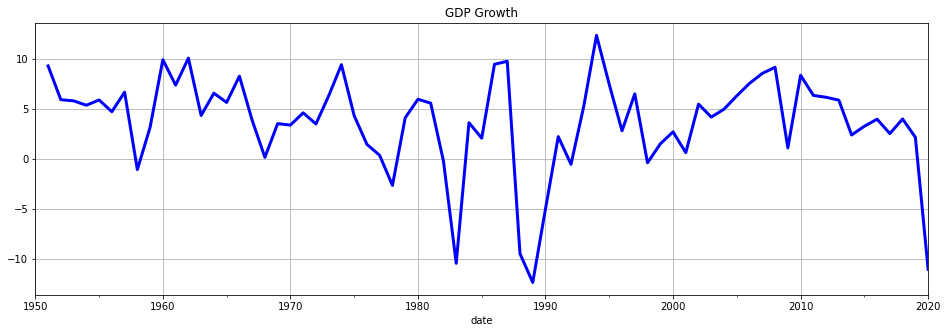

In [3]:
# Growth of GDP
df["dy"]= df["Y"].pct_change()*100

plt.figure(figsize=(16,5))
df["dy"].plot(color='b', linewidth=3.0)
plt.title('GDP Growth')
plt.grid(which='major')

## <a id='3_capital'> 3. Capital growth</a>

The capital series are not reported directly, one must calculate them. For this the perpetual inventory method is needed, in this method the capital is a function of Gross Fixed Investment

$$K_{t} = (1-\delta) K_{t-1} + I_{t}$$

where $\delta$ is the deprecation rate, following <a href='#cesram'> Céspedes & Ramírez (2016)</a> this parameter is setted at $5\%$. Also note that this function depends on the initial value of capital, to calculate this value we use the next equation

$$K_{0} = \frac{I_{1}}{g+\delta}$$

where $g$ is the long run economic growth. With this we can calculate the capital series.

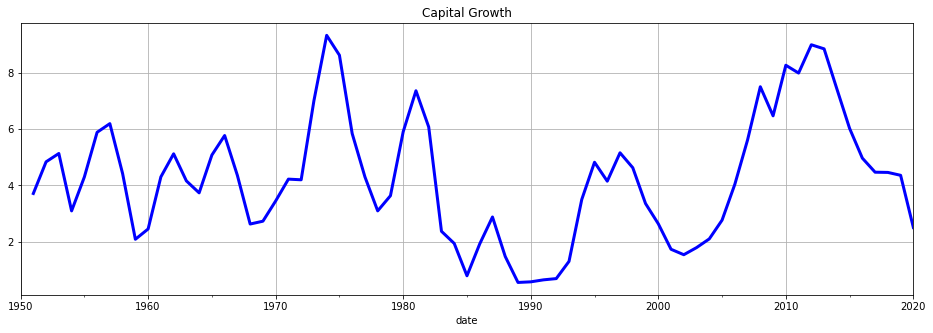

In [4]:
# Long run growth rate
g = np.mean(df["Y"].pct_change())

# Deprecation rate
δ = 0.05

# Capital series
df["K"] = 0 # Empty series
df["K"][0] = df["I"][1]/(g + δ) # Initial point
for t in range(1,len(df["K"])):
    df["K"][t] = (1-δ)*df["K"][t-1] + df["I"][t] # Rest of series

# Growth of capital
df["dk"] = df["K"].pct_change()*100
plt.figure(figsize=(16,5))
df["dk"].plot(color='b', linewidth=3.0)
plt.title('Capital Growth')
plt.grid(which='major')


## <a id='4_labor'> 4. Labor growth </a>
For the labor force we use the Economically Active Population and get the growth rate.

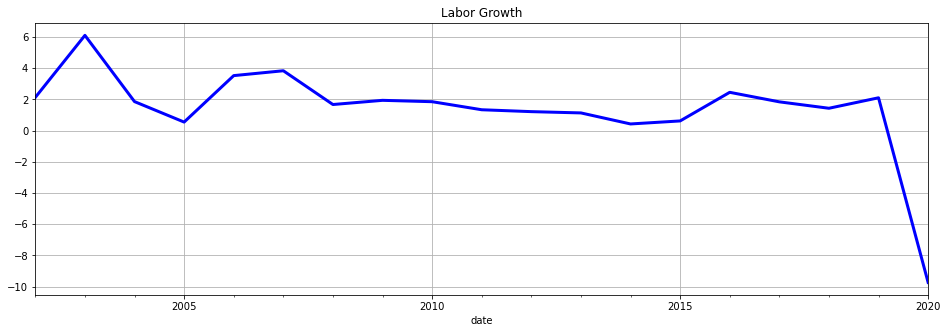

In [5]:
# Growth of GDP
df["dl"]= df["L"].pct_change()*100

plt.figure(figsize=(16,5))
df['2002-01-01':'2020-01-01']["dl"].plot(color='b', linewidth=3.0)
plt.title('Labor Growth')
plt.grid(which='major')

## <a id = '5_product'>5. Productivity </a>

Calculated as the difference between GDP and the other factors in the production function

$$\Delta a_{t} = \Delta y_{t} - \alpha \Delta k_{t} - (1 - \alpha) \Delta l_{t}$$

Following <a href='#cesram'> Céspedes & Ramírez (2016)</a> we use $\alpha = 0.5$

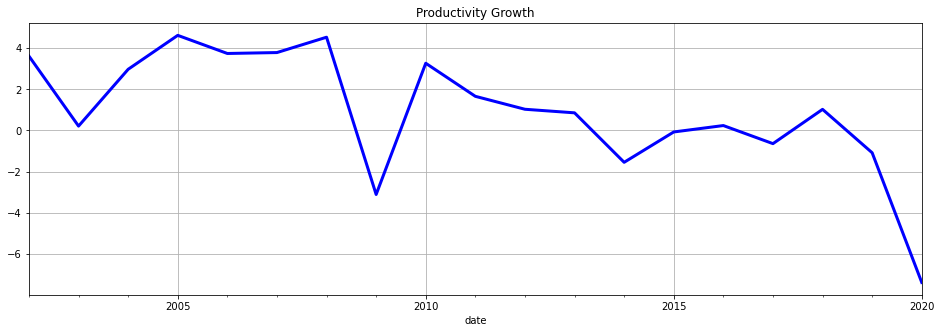

In [6]:
# Productivity growth
α = 0.5
df["da"]  = df["dy"] - (α)*df["dk"] - (1-α)*df["dl"]
# Plot
plt.figure(figsize=(16,5))
df['2002-01-01':'2020-01-01']["da"].plot(color='b', linewidth=3.0)
plt.title('Productivity Growth')
plt.grid(which='major')

## <a id='6_cont_graph'>6. Growth Contributions - Graph </a>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


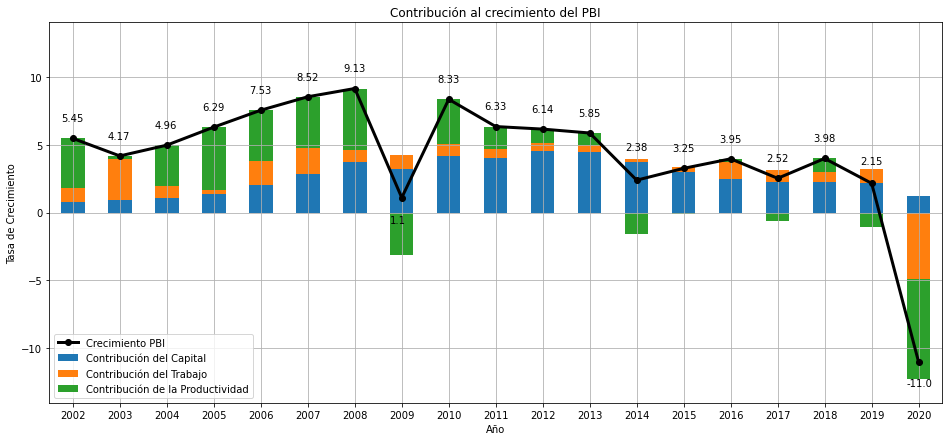

In [7]:
# New data frame for growth decomposition
decomp = df[['dy', 'dk', 'dl', 'da']].copy()
decomp = decomp['2002-01-01':'2020-01-01']
decomp["adk"] = α*decomp["dk"]
decomp["adl"] = (1-α)*decomp["dl"]
growth_comp = decomp[['adk', 'adl','da']].copy()

## Plot
# Bar Plot
growth_comp.index = pd.to_datetime(growth_comp.index, format = '%Y').strftime('%Y')
ax = growth_comp.plot.bar(stacked=True,
                          figsize=(16, 7))
# Growth data label
vals = list(decomp.dy.values) 
Xs = list(range(0,19))
Ys = [5.45,4.17,4.96,6.29,7.53,8.52,9.13,-2,8.33,6.33,6.14,5.85,3.38,3.25,3.95,2.52,3.98,2.35,-14]
for i in Xs:    
    ax.annotate(round(vals[i],2), xy=(Xs[i]-0.25,Ys[i]+1.25))
    
# Line Plot
decomp.plot(y=['dy'],
            color = 'k', linewidth=3.0, marker = "o",
            ax=ax,
            use_index=False)
    
# Plot adjustments    
lab_names = ['Crecimiento PBI',
             'Contribución del Capital',
             'Contribución del Trabajo',
             'Contribución de la Productividad']
plt.xlabel("Año")
plt.ylabel("Tasa de Crecimiento")
plt.legend(lab_names, loc = 'lower left')
plt.ylim(-14, 14)
plt.title('Contribución al crecimiento del PBI')
plt.grid(which='major')
plt.savefig(r".\images\growth_contrib.png", bbox_inches='tight')
plt.savefig(r".\images\growth_contrib.eps", bbox_inches='tight')

## <a id='7_cont_tab'> 7. Growth Contributions - Table </a>

In [8]:
# Means of economic growth
my_0208 = round(np.mean(decomp['2002-01-01':'2008-01-01']["dy"]),2)
my_09   = round(np.mean(decomp['2009-01-01':'2009-01-01']["dy"]),2)
my_1019 = round(np.mean(decomp['2010-01-01':'2019-01-01']["dy"]),2)
my_20   = round(np.mean(decomp['2020-01-01':'2020-01-01']["dy"]),2)
my_0220 = round(np.mean(decomp['2002-01-01':'2020-01-01']["dy"]),2)

# Means of capital contributions
mdk_0208 = round(np.mean(decomp['2002-01-01':'2008-01-01']["adk"]),2)
mdk_09   = round(np.mean(decomp['2009-01-01':'2009-01-01']["adk"]),2)
mdk_1019 = round(np.mean(decomp['2010-01-01':'2019-01-01']["adk"]),2)
mdk_20   = round(np.mean(decomp['2020-01-01':'2020-01-01']["adk"]),2)
mdk_0220 = round(np.mean(decomp['2002-01-01':'2020-01-01']["adk"]),2)

# Means of labor contributions
mdl_0208 = round(np.mean(decomp['2002-01-01':'2008-01-01']["adl"]),2)
mdl_09   = round(np.mean(decomp['2009-01-01':'2009-01-01']["adl"]),2)
mdl_1019 = round(np.mean(decomp['2010-01-01':'2019-01-01']["adl"]),2)
mdl_20   = round(np.mean(decomp['2020-01-01':'2020-01-01']["adl"]),2)
mdl_0220 = round(np.mean(decomp['2002-01-01':'2020-01-01']["adl"]),2)

# Means of productivity contribution
mda_0208 = round(np.mean(decomp['2002-01-01':'2008-01-01']["da"]),2)
mda_09   = round(np.mean(decomp['2009-01-01':'2009-01-01']["da"]),2)
mda_1019 = round(np.mean(decomp['2010-01-01':'2019-01-01']["da"]),2)
mda_20   = round(np.mean(decomp['2020-01-01':'2020-01-01']["da"]),2)
mda_0220 = round(np.mean(decomp['2002-01-01':'2020-01-01']["da"]),2)

table_data = {'Producto': [my_0208, my_09, my_1019, my_20, my_0220],
              'Capital': [mdk_0208, mdk_09, mdk_1019, mdk_20, mdk_0220],
              'Trabajo': [mdl_0208, mdl_09, mdl_1019, mdl_20, mdl_0220],
              'Productividad': [mda_0208, mda_09, mda_1019, mda_20, mda_0220]}

tab_df = pd.DataFrame.from_dict(table_data, orient='index',
                       columns=['2002-08', '2009', '2010-19', '2020', '2002-20'])
tab_df

,2002-08,2009,2010-19,2020,2002-20
Producto,6.58,1.10,4.49,-11.00,4.26
Capital,1.81,3.24,3.29,1.25,2.64
Trabajo,1.41,0.97,0.72,-4.87,0.69
Productividad,3.36,-3.11,0.48,-7.39,0.93


## References

<a id='cesram'> Nikita Céspedes & Nelson Ramírez Rondán, 2016 </a>. ["Estimación de la productividad total de los factores en el Perú: enfoques primal y dual,"](https://repositorio.up.edu.pe/handle/11354/1496) Chapters of Books, in: Nikita Céspedes & Pablo Lavado & Nelson Ramírez Rondán (ed.), Productividad en el Perú: medición, determinantes e implicancias, edition 1, volume 1, chapter 2, pages 43-68, Fondo Editorial, Universidad del Pacífico.